<a href="https://colab.research.google.com/github/alinarogova/HW/blob/master/lecture_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лінійна регресія

## Визначення
Регресія -- це алгоритм **моделювання зв'язку** між залежною числовою ознакою та однією чи декількома залежними ознаками.

Мета лінійної регресії – знайти **лінійний зв’язок** між змінними, який можна використовувати для прогнозування залежної ознаки.

##Типи лінійної регресії
Існує два типи лінійної регресії: **проста** лінійна регресія та **множинна** лінійна регресія. Проста лінійна регресія включає лише одну незалежну змінну, тоді як множинна лінійна регресія включає дві або більше незалежних змінних.

In [ ]:
salary # y
experience # X

# linear model
salary = 10_000 * experience + 5000

user_experience = 2.5 # 2,5 роки досвіду
user_salary = 10_000 * 2.5 + 5000 = 30_000

## Проста лінійна регресія


$$y = \beta + \alpha*X $$

де:

* $y$ – залежна змінна
* $X$ – незалежна змінна
* $\beta$ – зсув (intercept)
* $\alpha$ – ваговий множник(нахил, coef)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

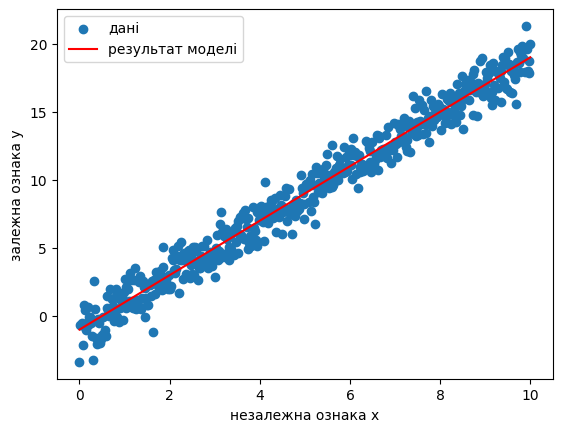

In [ ]:
x = np.linspace(0, 10, 500)

y = 2*x - 1 + np.random.normal(size=x.shape)

plt.scatter(x, y, label="дані")
plt.plot([0, 10], [-1, 19], c="red", label="результат моделі")
plt.xlabel("незалежна ознака x")
plt.ylabel("залежна ознака y")
plt.legend()

## Множинна лінійна регресія

$$Y = \beta + \alpha_1*X_1 + \alpha_2*X_2 + \cdots + \alpha_n*X_n$$

де:
* $Y:$ залежна змінна
* $X_1, X_2, X_3, X_4:$ Незалежні змінні
* $\beta:$ зсув (intercept)
* $\alpha_1, \alpha_2, \cdots, \alpha_n:$ коефіцієнти(вагові множники, coefficients)

<img src = "https://miro.medium.com/max/875/1*dToo8pNrhBmYfwmPLp6WrQ.png">

# Приклад 1

Дані про дохід від продажу морозива за день та температуру надворі

[джерело](https://www.kaggle.com/datasets/vinicius150987/ice-cream-revenue/data?select=IceCreamData.csv)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/IceCreamData.csv")

In [ ]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


## Точкова діаграма

<Axes: xlabel='Temperature', ylabel='Revenue'>

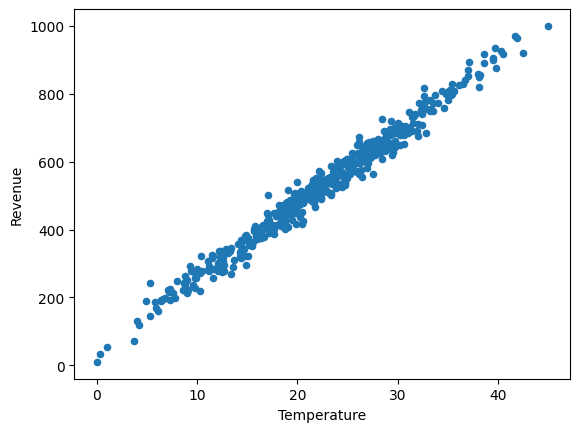

In [ ]:
df.plot(kind='scatter', x='Temperature', y='Revenue')

## Тренування моделі

###Поділ даних на залежну та незалежну ознаки

In [ ]:
y = df['Revenue']
# X = df['Temperature'] -- неправильно
X = df.drop(columns='Revenue')

In [ ]:
X.shape

(500, 1)

### Поділ на тренувальні та тестові дані

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
X_train.shape, y_train.shape

((400, 1), (400,))

In [ ]:
X_test.shape

(100, 1)

In [ ]:
X_train

,Temperature
249,18.148952
433,8.756004
19,21.775948
322,18.439982
332,15.843022
...,...
106,23.761436
270,24.628611
348,38.185199
435,15.916678


In [ ]:
y_train

,Revenue
249,473.568112
433,246.787161
19,534.622865
322,463.480508
332,379.564268
...,...
106,553.445291
270,603.305339
348,856.303304
435,381.043377


###Модель

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

# тренування
model.fit(X_train, y_train)

LinearRegression()

## Результат

In [ ]:
model.coef_

array([21.38197386])

In [ ]:
model.intercept_

46.80464127742374

In [ ]:
# формула для регресії
# дохід = 21,38 * температура + 46,8
# y = 21.38*X + 46.8

<div align="center"><font size='6'> Дохід = 21.4*Температура + 46.8 </font></div>

## Використання

In [ ]:
temp = 32

# створення таблиці 1х1
# 1
X = [[temp]]

# 2
X = np.array(temp)
X = X.reshape(1, 1)

# 3
X = pd.DataFrame({'Temperature': [temp]})

X

,Temperature
0,32


In [ ]:
model.predict(X)

array([731.02780465])

In [ ]:
21.38*temp + 46.8

730.9599999999999

In [ ]:
# декілька прогнозів

X = pd.DataFrame({'Temperature': [32, 25, 27]})

X

,Temperature
0,32
1,25
2,27


In [ ]:
model.predict(X)

array([731.02780465, 581.35398766, 624.11793537])

In [ ]:
y = df['Revenue']
# X = df['Temperature'] -- неправильно
X = df.drop(columns='Revenue')

# model.predict(X)

In [ ]:
df1 = df.copy()
df1['pred'] = model.predict(X)
df1['residual'] = df1['Revenue'] - df1['pred']

df1.head()

,Temperature,Revenue,pred,residual
0,24.566884,534.799028,572.093122,-37.294093
1,26.005191,625.190122,602.846959,22.343163
2,27.790554,660.632289,641.021538,19.610751
3,20.595335,487.706960,487.173557,0.533403
4,11.503498,316.240194,292.772127,23.468067


In [ ]:
# -100 100 -> mean = 0

In [ ]:
df1['residual'].abs().mean()  # середня помилка, метрика, точність

19.598906568911023

In [ ]:
# теж саме через цикл for
# MAE
total = 0

for i in range(0, len(df)):
    total += np.abs(df1.loc[i, 'residual'])

total / len(df)

19.598906568911016

In [ ]:
# MSE

total = 0

for i in range(0, len(df)):
    total += df1.loc[i, 'residual'] ** 2

total / len(df)

623.7082956455376

In [ ]:
mse_usd = ((df1['Revenue'] - df1['pred']) ** 2).mean()
mse_usd

623.7082956455374

In [ ]:
mse_uah = ((df1['Revenue']*40 - df1['pred']*40) ** 2).mean()

mse_uah

1600.0

In [ ]:
mse_uah / mse_usd

1600.0

In [ ]:
df1['Revenue'].var()

30766.826609951197

In [ ]:
(df1['Revenue']*40).var()

49226922.57592193

In [ ]:
(df1['Revenue']*40).var() / df1['Revenue'].var()

1600.0000000000005

In [ ]:
mse_usd / df1['Revenue'].var()

0.020272103572872405

##Метрики

Метрики -- це числові характеристики для оцінки ефективності моделі:

* Середнє квадратичне відхилення (MSE)
* Корінь середньоквадратичного відхилення (RMSE).
* Середнє абсолютне відхилення (MAE).
* R² або коефіцієнт детермінації.
* Скоригований R²

### Середня абсолютне відхилення:

MAE — це модуль різниці між цільовим значенням і значенням, передбаченим моделлю.

MAE більш стійие до викидів і не штрафує за помилки так сильно, як mse.

MAE — це лінійна оцінка, яка означає, що всі індивідуальні відмінності зважені однаково.

Він не підходить для задач, де потрібно приділяти більше уваги викидам.

<img src = "https://miro.medium.com/proxy/0*zX9jlpZ8k0CuEpFE.jpg">

### Середнє квадратичне відхилення:

`MSE або середнє квадратичне відхилення` є однією із найбільш частовживаних метрик для завдань регресії.

Це просто середнє значення квадрата різниці між цільовим значенням і значенням, передбаченим регресійною моделлю.

Зводячи різницю в квадрат, він штрафує навіть невелику помилку, яка призводить до переоцінки того, наскільки погана модель.

Дану метрику часто використовують також тому, що вона є диференційованою(пізніше обговоримо).


<img src = "https://miro.medium.com/max/875/0*aTUPK_ILg7-n0znw.jpg">

### Корінь середньо квадратичного відхилення:

RMSE є найбільш широко використовуваною метрикою для задач регресії та є квадратним коренем із середньо квадратичного відхилення між цільовим значенням і значенням, передбаченим моделлю.

У деяких випадках це краще, тому що помилки спочатку зводяться в квадрат перед усередненням, що створює високий штраф за великі помилки.

Це означає, що RMSE є корисним, коли чутливість моделі до великих помилок небажана.

<img src = "https://miro.medium.com/max/650/0*TO7BkvQwtnvVzkK4.png">

### R²

Коефіцієнт детермінації або R² — ще один показник, який використовується для оцінки ефективності регресійної моделі.

Метрика допомагає нам порівнювати наскільки краща наша модель за базову модель, яка завжди прогнозує середнє арифметичне, або медіану.

R² – це безмасштабна оцінка, яка означає, що значення R² завжди буде меншим або дорівнює 1, не має значення, чи є значення занадто великими чи занадто малими.

Значення в 1 означає, що модель хороша, 0 - що така сама як базова

<img src = "https://miro.medium.com/max/783/0*_Bk3m941thWlveS3.png">

### Скоригований R²:

Скоригований R² має те саме значення, що й R², але є його вдосконаленням.

R² страждає від проблеми, пов’язаної з підвищенням значенням при збільшені кількості незалежних ознак, навіть якщо модель не покращується, що може ввести дослідника в оману.

Скоригований R² завжди нижчий за R², оскільки він коригується з урахуванням кількості ознак і показує покращення, лише якщо є реальне покращення.

<img src = "https://miro.medium.com/max/495/0*WkdWEm2993yhYvUA.png">

In [ ]:
def mae(y_true, y_pred):
  residual = y_true - y_pred

  return residual.abs().mean()

In [ ]:
def mse(y_true, y_pred):
  residual = y_true - y_pred

  return (residual**2).mean()

In [ ]:
def rmse(y_true, y_pred):
  return mse(y_true, y_pred) ** 0.5

In [ ]:
def r2(y_true, y_pred):
  y_mean = y_true.mean()

  return 1 - mse(y_true, y_pred) / mse(y_true, y_mean)

In [ ]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [ ]:
all_metrics = pd.DataFrame()

#y_train, X_train

y_pred = model.predict(X_train)
all_metrics['train'] = get_metrics(y_train, y_pred)

y_pred = model.predict(X_test)
all_metrics['test'] = get_metrics(y_test, y_pred)

all_metrics

,train,test
MAE,19.70,19.18
MSE,616.51,652.52
RMSE,24.83,25.54
R2,0.98,0.98


# Приклад 2

Дані про ціну діамантів

[джерело]()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds2.csv", usecols=['carat', 'cut', 'price'])

In [ ]:
df.head()

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335


![](https://www.datocms-assets.com/25216/1654106726-m-diamond-cut-1125x540.jpg)

## Обробка категоріальних ознак

<Axes: >

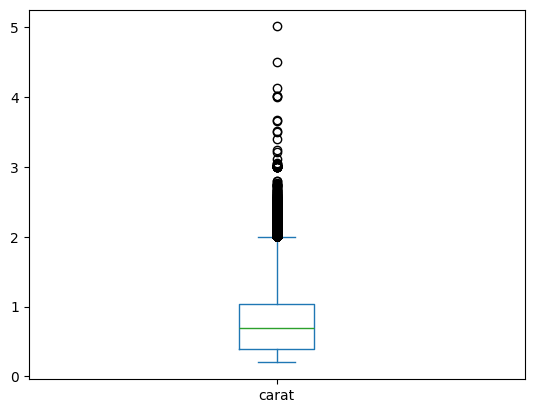

In [ ]:
df['carat'].plot(kind='box')

<Axes: >

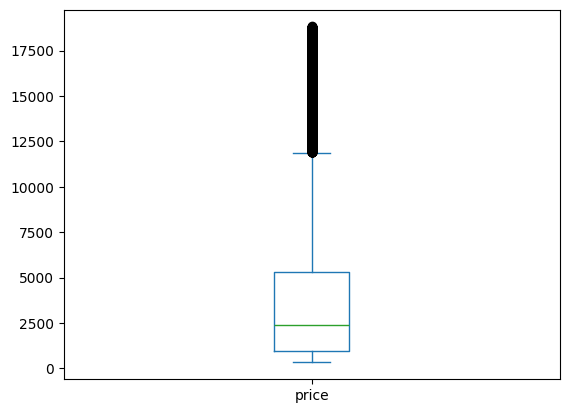

In [ ]:
df['price'].plot(kind='box')

In [ ]:
df['cut'].value_counts()

,count
cut,
Ideal,21551
Premium,13793
Very Good,12083
Good,4906
Fair,1610


In [ ]:
df.head()

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335


In [ ]:
y = df['price']
X = df.drop(columns='price') # все окрім price

In [ ]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [ ]:
X.head()

,carat,cut
0,0.23,Ideal
1,0.21,Premium
2,0.23,Good
3,0.29,Premium
4,0.31,Good


## Тренування моделі

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(X_train, y_train)


In [ ]:
X_train.shape

(43154, 2)

In [ ]:
X_train

,carat,cut
9159,1.01,Very Good
14131,1.10,Premium
15757,1.50,Good
24633,1.53,Premium
49831,0.84,Fair
...,...,...
11284,1.05,Very Good
44732,0.47,Ideal
38158,0.33,Very Good
860,0.90,Premium


In [ ]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)
encoder.set_output(transform='pandas')

# тренування
encoder.fit(X_train[['cut']])

# використання
X_train_prep_cut = encoder.transform(X_train[['cut']])

X_train_prep_cut.head()


,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
9159,0.0,0.0,0.0,0.0,1.0
14131,0.0,0.0,0.0,1.0,0.0
15757,0.0,1.0,0.0,0.0,0.0
24633,0.0,0.0,0.0,1.0,0.0
49831,1.0,0.0,0.0,0.0,0.0


In [ ]:
'hello' + ', world'  # конкатенація

'hello, world'

In [ ]:
# добавити стовпчик carat

X_train_prep = pd.concat([X_train['carat'], X_train_prep_cut], axis=1)

X_train_prep.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
9159,1.01,0.0,0.0,0.0,0.0,1.0
14131,1.10,0.0,0.0,0.0,1.0,0.0
15757,1.50,0.0,1.0,0.0,0.0,0.0
24633,1.53,0.0,0.0,0.0,1.0,0.0
49831,0.84,1.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train_prep, y_train)

LinearRegression()

In [ ]:
# результат
from sklearn import metrics

y_train_pred = model.predict(X_train_prep)

metrics.r2_score(y_train_pred, y_train)

0.8312646638172457

In [ ]:
metrics.mean_absolute_error(y_train_pred, y_train)

990.4350270850902

In [ ]:
# обробка
X_test_prep_cut = encoder.transform(X_test[['cut']])

X_test_prep = pd.concat([X_test['carat'], X_test_prep_cut], axis=1)

X_test_prep.head()

,carat,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
1388,0.24,0.0,0.0,1.0,0.0,0.0
19841,1.21,0.0,0.0,0.0,0.0,1.0
41647,0.50,1.0,0.0,0.0,0.0,0.0
41741,0.50,0.0,0.0,1.0,0.0,0.0
17244,1.55,0.0,0.0,1.0,0.0,0.0


In [ ]:
# test(нові дані)
y_test_pred = model.predict(X_test_prep)

metrics.r2_score(y_test_pred, y_test)

0.8358435325198214

## Коефіцієнти

## Покращення

## Сама модель

<div align="center"><font size='6'> Для Fair:     Ціна = 7865*Карат - 3828 </font></div>
<div align="center"><font size='6'> Для Good:      Ціна = 7865*Карат - 2737 </font></div>
<div align="center"><font size='6'> Для Very Good: Ціна = 7865*Карат - 2357 </font></div>
<div align="center"><font size='6'> Для Premium:   Ціна = 7865*Карат - 2435 </font></div>
<div align="center"><font size='6'> Для Ideal:     Ціна = 7865*Карат - 2064 </font></div>




Гранювання |Модель
-----------|---------------------------
Fair       |Ціна = 7865*Карат - 3828
Good       |Ціна = 7865*Карат - 2737
Very Good  |Ціна = 7865*Карат - 2357
Premium    |Ціна = 7865*Карат - 2435
Ideal      |Ціна = 7865*Карат - 2064

## Використання

# Приклад 3

Що робити коли є пропущені значення в даних?

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds2.csv", usecols=['carat', 'cut', 'price'])

Штучно добавимо пропущені значення в наші дані

In [ ]:
for column in df.columns:
  mask = np.random.binomial(1, 0.05, size=df.shape[0]).astype(bool)
  df.loc[mask, column] = np.nan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   51224 non-null  float64
 1   cut     51206 non-null  object 
 2   price   51273 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [ ]:
df.head()

,carat,cut,price
0,0.23,Ideal,326.0
1,0.21,Premium,326.0
2,0.23,Good,327.0
3,0.29,Premium,334.0
4,0.31,Good,335.0


## Видалення рядків з невідомим значенням у

Видаляємо ті рядки, в яких пропущені значення в стовпчику у(те що наша модель повинна прогнозувати)

In [ ]:
df.dropna(subset='price', inplace=True)

In [ ]:
y = df['price']
X = df.drop(columns='price')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

## Заповнення пропусків

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

Для початку нам потрібно отримати назви стовпчиків з числовими та категоріальними ознаками, тому що для них обробка буде відрізнятися

In [ ]:
num_columns = X_train.select_dtypes(include='number').columns
cat_columns = X_train.select_dtypes(include='object').columns

In [ ]:
num_columns, cat_columns

(Index(['carat'], dtype='object'), Index(['cut'], dtype='object'))

Для числових ознак заповнюємо пропущені значення в кожному стовпчику його медіаною.

В параметр `steps` передаємо список кортежів з двлма значеннями: назва кроку та сам крок(об'єкт який здійснює обробку)

[(назва1, крок1),

 (назва2, крок2),

  ...
  
  ]

In [ ]:
num_transformer = Pipeline(
    [
        ('impute', SimpleImputer(strategy='median'))
    ]
)

num_transformer

Pipeline(steps=[('impute', SimpleImputer(strategy='median'))])

Для категоріальних ознак застосовуємо наступну обробку:
* заповнюємо пропущені значення в кожному стовпчику значенням, яке найчастіше зустрічається
* застосовуємо кодування OneHotEncoder

In [ ]:
cat_transformer = Pipeline(
    [
        ('impute', SimpleImputer(strategy='constant',   # strategy='most_frequent'
                                 fill_value='UNKNOWN')),
         ('onehot', OneHotEncoder(sparse_output=False))
    ]
)

cat_transformer

Pipeline(steps=[('impute',
                 SimpleImputer(fill_value='UNKNOWN', strategy='constant')),
                ('onehot', OneHotEncoder(sparse_output=False))])

Об'єднуємо обробку числових і категоріальних ознак в одну

В параметр `transformers` передаємо список кортежів з трьома значеннями: назва трансформера, сам трансформер, назви або індекси стовпчиків до яких це застосовувати

[(назва1, трансформер1, стовпчики1),

 (назва2, трансформер2, стовпчики2),

  ...
  
  ]

In [ ]:
preprocessor = ColumnTransformer(
    [
        ('num', num_transformer, num_columns),
        ('cat', cat_transformer, cat_columns)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['carat'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value='UNKNOWN',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index(['cut'], dtype='object'))])

Створюємо нову модель

In [ ]:
full_model = Pipeline(
    [
        ('prep', preprocessor),
        ('lin reg', LinearRegression())
    ]
)

full_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['carat'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='UNKNOWN',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['cut'], dtype='object'))])),
                ('lin reg', LinearRegression())])

## Використання

In [ ]:
full_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['carat'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='UNKNOWN',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['cut'], dtype='object'))])),
                ('lin reg', LinearRegression())])

In [ ]:
y_train_pred = full_model.predict(X_train)


metrics.r2_score(y_train_pred, y_train)

0.764074029260453

In [ ]:
y_test_pred = full_model.predict(X_test)

metrics.r2_score(y_test_pred, y_test)

0.765471445458346

## Збереження

In [ ]:
import joblib
joblib.dump(full_model, 'my_model.pkl')

['my_model.pkl']

In [ ]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['carat'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='UNKNOWN',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(sparse_output=False))]),
                                                  Index(['cut'], dtype='object'))])),
                ('lin reg', LinearRegression())])

# Попередня обробка даних

Попередня обробка даних - це важливий крок у конвеєрі науки про дані. Вона передбачає перетворення необроблених даних у чистий і придатний для використання формат, що робить їх готовими для аналізу або навчання моделей. Ось чому ви повинні виконувати попередню обробку даних і як ефективно працювати з різними типами даних.

## Чому потрібно попередньо обробляти дані

Дані часто надходять у різних форматах і містять неузгодженості, пропущені значення та шум. Попередня обробка допомагає

- **Покращити продуктивність моделі**: Чисті дані можуть призвести до кращої точності прогнозування.
- **Впоратися з відсутніми значеннями**: Вирішити, як обробити або врахувати відсутні дані.
- **Нормалізувати дані**: Переконайтеся, що числові характеристики мають узгоджену шкалу.
- **Перетворення категоріальних даних**: Перетворіть категоріальні змінні в числові представлення, зрозумілі моделям машинного навчання.
- **Зменшити перенавчання**: Спрощення моделі та зменшення шуму в даних.

## Категоріальна обробка

### OneHotEncoder

**Опис**: Ця методика перетворює категоріальні змінні у формат, який може бути наданий алгоритмам ML для кращого прогнозування.

- **Параметри**:
  - `categories`: Визначає категорії для кодування.
  - `drop`: Може відкинути одну з категорій, щоб уникнути мультиколінеарності.
  - `sparse`: Якщо встановлено в True, повертає розріджену матрицю; якщо False, повертає щільний масив.
  - `handle_unknown`: Визначає поведінку для невідомих категорій під час перетворення (варіанти: 'error', 'ignore').

<div>
<img src=https://miro.medium.com/v2/resize:fit:1400/1*ggtP4a5YaRx6l09KQaYOnw.png width='300%', height='300%'>
</div>

### OrdinalEncoder

**Опис**: Використовується для порядкових категорійних ознак, де категорії мають значущий порядок (наприклад, «низький», «середній», «високий»).

- **Параметри**:
  - `categories`: Визначає категорії та їх порядок.
  - `handle_unknown`: Визначає поведінку для невідомих категорій під час перетворення.

<div>
<img src=https://datasciencedojo.com/wp-content/uploads/Categorical-data-encoding-label-encoding.png width='50%', height='50%'>
</div>

## Числова обробка

### StandardScaler

**Опис**: Стандартизує ознаки шляхом вилучення середнього значення та масштабування до одиничної дисперсії.

- Параметри**:
  - `copy`: Якщо значення True, робиться копія даних; якщо False, змінює вхідні дані.
  - `with_mean`: Якщо True, вирівнювання даних по центру перед масштабуванням.
  - `with_std`: Якщо True, масштабування до одиничної дисперсії.

<div>
<img src=https://miro.medium.com/v2/resize:fit:1400/1*mViMXFWPqg7Vg2WwjaoKVQ.png width='50%', height='50%'>
</div>

### PowerTransform

**Опис**: Застосовує степеневе перетворення, щоб зробити дані більш гауссівськими.

- **Параметри**:
  - `метод`: Може бути 'box-cox' (тільки для додатних даних) або 'yeo-johnson' (може обробляти від'ємні значення).
  - `standardize`: Якщо значення True, масштабує перетворені дані так, щоб вони мали нульове середнє та одиничну дисперсію.


<div>
<img src=https://media.geeksforgeeks.org/wp-content/uploads/20200531232546/output275.png width='70%', height='70%'>
</div>

### QuantileTransformer

**Опис**: Перетворює ознаки відповідно до рівномірного або нормального розподілу на основі квантилів даних.

- **Параметри**:
  - `n_quantiles`: Кількість квантилів для створення.
  - `output_distribution`: Може бути «uniform» або «normal».
  - `copy`: Якщо значення True, створюється копія даних.

<div>
<img src=https://www.tandfonline.com/cms/asset/b2af5d97-9625-45f7-9a34-cf0da9b2e600/cjas_a_1630372_f0003_oc.jpg width='50%' height='50%'>
</div>

### PolynomialFeatures

**Опис**: Генерує поліноміальні функції та функції взаємодії, що дозволяє створювати більш складні моделі.

- **Параметри**:
  - `degree`: Степінь поліноміальних функцій (наприклад, 2 для квадратичних).
  - `include_bias`: Якщо значення True, включає стовпчик одиницями.
  - `interaction_only`: Якщо значення True, створюються лише особливості взаємодії.

приклад перетворення двох стовпчиків (X, Y)

`interaction_only = True`  - $X, Y, XY$

`interaction_only = False` - $X, Y, X^2, Y^2, XY$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

encoder = PolynomialFeatures(interaction_only=False, degree=2)
encoder.set_output(transform='pandas')

df1 = df.dropna()
encoder.fit_transform(df1[['carat', 'price']])

### FuncTransformer

FuncTransformer - це універсальний інструмент у scikit-learn, який дозволяє вам застосовувати кастомні перетворення до ваших даних. Ви можете використовувати його для застосування таких функцій, як квадратний корінь, піднесення до квадрату або будь-яких інших математичних перетворень.

In [ ]:
from sklearn.preprocessing import FunctionTransformer


def transform(X):
    return np.hstack([np.sqrt(X), X, X**2])

def features_output(encoder, names):
    sqrt_names = [f'sqrt_{name}' for name in names]
    normal_names = [f'{name}' for name in names]
    squared_names = [f'{name}^2' for name in names]

    return sqrt_names + normal_names + squared_names


encoder = FunctionTransformer(func=transform,
                              feature_names_out=features_output)
encoder.set_output(transform='pandas')

encoder.fit_transform(df[['carat', 'price']])

#Припущення лінійної регресії
Перш ніж будувати модель лінійної регресії, важливо переконатися, що дані задовольняють певним вимогам або припущенням. Ці припущення включають **лінійність, незалежність, гомоскедастичність** і **нормальність**.



Гомоскедастичність: Дисперсія залишків має бути постійною на всіх рівнях незалежних змінних. Іншими словами, розкид залишків має бути однаковим для всіх прогнозованих значень.
Нормальність: залишки повинні мати нормальний розподіл. Це означає, що більшість залишків має бути близькою до нуля, а розподіл залишків має нагадувати дзвоноподібну криву.
Відсутність мультиколінеарності: незалежні змінні не повинні сильно корелювати одна з одною. Мультиколінеарність може призвести до ненадійних і нестабільних оцінок коефіцієнтів.

###Лінійність:
Зв’язок між незалежною ознакою y та залежною ознакою(бо ознаками) X має бути лінійним. Іншими словами, кожна ознака X повинна мати досить високий коефіцієнт кореляції Пірсона з ознакою y.

###Відсутність мультиколінеарності:
Незалежні змінні не повинні сильно корелювати одна з одною. Мультиколінеарність може призвести до ненадійних і нестабільних оцінок коефіцієнтів.

In [ ]:
num_df = df.select_dtypes(include='number')
corr = num_df.corr(method="pearson")

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.clim(-1, 1)

###Нормальність всіх ознак:
Всі ознаки повинні мати нормальний(або гаусовий) розподіл. Це означає, що їхні гістограми повинні нагадувати симетричну дзвоноподібну криву.

In [ ]:
bins = int(np.sqrt(len(df)))

for column in df.columns:
  if df.dtypes[column] in (int, float):
    df[column].plot(kind="hist", bins=bins)
    plt.title(column)
    plt.show()

###Незалежність залишків:
Залишки (різниця між прогнозованими та фактичними значеннями) мають бути незалежними один від одного. Це означає, що помилка в прогнозуванні однієї точки даних не повинна впливати на помилку в прогнозуванні іншої точки даних.

In [ ]:
y_pred = model.predict(X_test)
res = y_test - y_pred

plt.scatter(range(len(res)), res)
plt.xlabel("номер спостереження")
plt.ylabel("Залишки")
plt.title("Залишки - номер спостереження")

###Однорідність дисперсії(Homoscedasticity):
Стандартне відхилення залишків має бути однаковим для всіх прогнозованих значень.

<img src="https://i.ibb.co/3dJ1Cpj/homoskedasticity.png">

In [ ]:
plt.scatter(y_pred, res)
plt.axhline(0, color="green")
plt.xlabel("спрогнозоване значення")
plt.ylabel("Залишки")
plt.title("Залишки - прогноз")

###Нормальність залишків:
Залишки повинні мати нормальний розподіл. Це означає, що більшість залишків має бути близькою до нуля, а гістограма залишків має нагадувати симетричну дзвоноподібну криву.

In [ ]:
plt.hist(res, bins=bins)
plt.show()